In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy


In [41]:
os.chdir("/home/mario/Repository/Normal_Alzeihmer") 

In [42]:
data_path = "data/PPMI"
nifti_baseline_path = "/mnt/db_ext/RAW/PPMI/nifti_baseline"
nifti_full_path = "/mnt/db_ext/RAW/PPMI/nifti"

In [43]:
participant_status = pd.read_csv(os.path.join(data_path, "Participant_Status_06Nov2025.csv"))

In [44]:
# Load all metadata files
participant_status = pd.read_csv(os.path.join(data_path, "Participant_Status_06Nov2025.csv"))
demographics = pd.read_csv(os.path.join(data_path, "Demographics_06Nov2025.csv"))
age_at_visit = pd.read_csv(os.path.join(data_path, "Age_at_visit_06Nov2025.csv"))

print("Dataset shapes:")
print(f"  Participant Status: {participant_status.shape}")
print(f"  Demographics: {demographics.shape}")
print(f"  Age at Visit: {age_at_visit.shape}")

participant_status.head()

Dataset shapes:
  Participant Status: (7742, 30)
  Demographics: (7669, 29)
  Age at Visit: (42200, 3)


,PATNO,COHORT,COHORT_DEFINITION,ENROLL_DATE,ENROLL_STATUS,STATUS_DATE,SCREENEDAM,ENROLL_AGE,INEXPAGE,AV133STDY,...,ENRLPINK1,ENRLPRKN,ENRLSRDC,ENRLNORM,ENRLOTHGV,ENRLHPSM,ENRLRBD,ENRLLRRK2,ENRLSNCA,ENRLGBA
0,3000,2,Healthy Control,02/2011,Withdrew,10/2024,NaN,69.1,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0
1,3001,1,Parkinson's Disease,03/2011,Enrolled,09/2021,NaN,65.1,NaN,0.0,...,0.0,0.0,1.0,NaN,NaN,0,0,0,0,0
2,3002,1,Parkinson's Disease,03/2011,Withdrew,10/2024,NaN,67.6,NaN,0.0,...,0.0,0.0,1.0,NaN,NaN,0,0,0,0,0
3,3003,1,Parkinson's Disease,04/2011,Enrolled,01/2022,NaN,56.7,NaN,0.0,...,0.0,0.0,1.0,NaN,NaN,0,0,0,0,0
4,3004,2,Healthy Control,04/2011,Enrolled,01/2022,NaN,59.4,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0


## 2. Distribuzione per Cohort (Sani vs Patologici)

DISTRIBUZIONE PER COHORT
Prodromal                     : 5269 ( 68.1%)
Parkinson's Disease           : 1952 ( 25.2%)
Healthy Control               :  440 (  5.7%)
SWEDD                         :   81 (  1.0%)

Totale soggetti: 7742


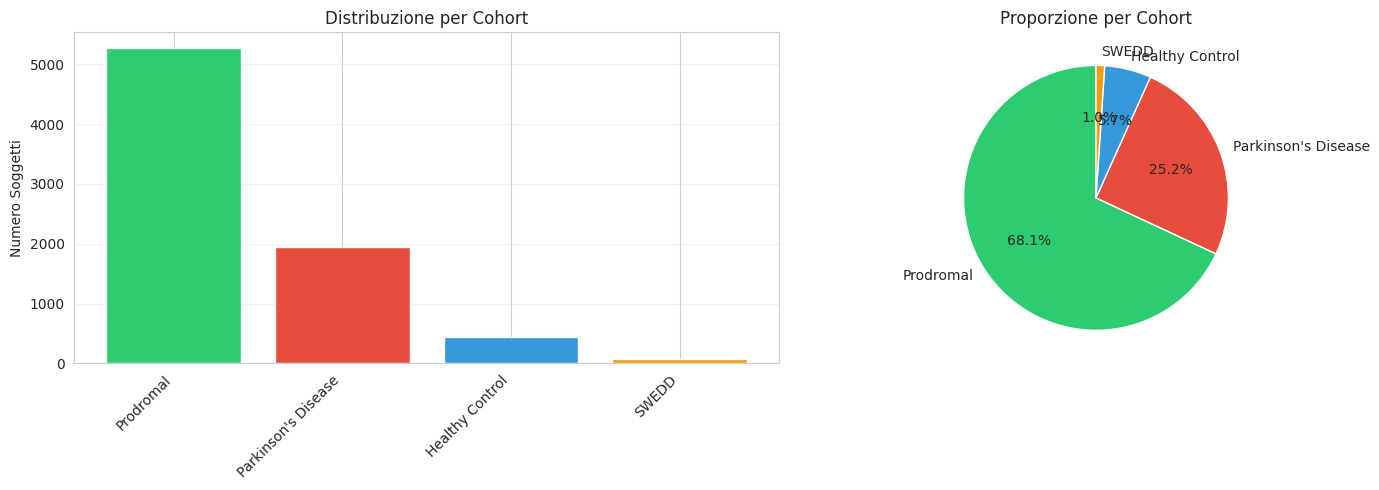

In [45]:
# Analisi distribuzione per cohort
import numpy as np
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 5)

# Conta per cohort
cohort_counts = participant_status['COHORT_DEFINITION'].value_counts()

print("="*80)
print("DISTRIBUZIONE PER COHORT")
print("="*80)
for cohort, count in cohort_counts.items():
    percentage = (count / len(participant_status)) * 100
    print(f"{cohort:30s}: {count:4d} ({percentage:5.1f}%)")

print(f"\nTotale soggetti: {len(participant_status)}")

# Visualizza
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Barplot
axes[0].bar(range(len(cohort_counts)), cohort_counts.values, color=['#2ecc71', '#e74c3c', '#3498db', '#f39c12', '#9b59b6', '#95a5a6'])
axes[0].set_xticks(range(len(cohort_counts)))
axes[0].set_xticklabels(cohort_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Numero Soggetti')
axes[0].set_title('Distribuzione per Cohort')
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
colors = ['#2ecc71', '#e74c3c', '#3498db', '#f39c12', '#9b59b6', '#95a5a6']
axes[1].pie(cohort_counts.values, labels=cohort_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors[:len(cohort_counts)])
axes[1].set_title('Proporzione per Cohort')

plt.tight_layout()
plt.show()

## 3. Filtro Soggetti Sani (Healthy Controls)

In [46]:
# Filtra solo Healthy Controls enrolled
healthy_controls = participant_status[
    ((participant_status['COHORT'] == 2) | (participant_status['COHORT_DEFINITION'] == 'Healthy Control')) &
    (participant_status['ENROLL_STATUS'] == 'Enrolled')
]

print("="*80)
print("SOGGETTI HEALTHY CONTROL")
print("="*80)
print(f"Totale Healthy Controls enrolled: {len(healthy_controls)}")
print(f"\nDistribuzione enrollment status (tutti HC):")
print(participant_status[participant_status['COHORT'] == 2]['ENROLL_STATUS'].value_counts())

# Merge con demographics
healthy_with_demo = healthy_controls.merge(demographics, on='PATNO', how='left')

print(f"\nHealthy Controls con dati demografici: {healthy_with_demo.shape[0]}")
print(f"Missing demographics: {len(healthy_controls) - healthy_with_demo.shape[0]}")

healthy_with_demo.head()

SOGGETTI HEALTHY CONTROL
Totale Healthy Controls enrolled: 230

Distribuzione enrollment status (tutti HC):
ENROLL_STATUS
Enrolled             230
Withdrew              90
Screen failed         55
Excluded              35
Declined              14
Complete              11
Withdraw Deceased      4
Baseline Withdraw      1
Name: count, dtype: int64

Healthy Controls con dati demografici: 230
Missing demographics: 0


,PATNO,COHORT,COHORT_DEFINITION,ENROLL_DATE,ENROLL_STATUS,STATUS_DATE,SCREENEDAM,ENROLL_AGE,INEXPAGE,AV133STDY,...,HISPLAT,RAASIAN,RABLACK,RAHAWOPI,RAINDALS,RANOS,RAWHITE,RAUNKNOWN,ORIG_ENTRY,LAST_UPDATE
0,3004,2,Healthy Control,04/2011,Enrolled,01/2022,NaN,59.4,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,03/2011,2022-11-07 00:00:00.0
1,3009,2,Healthy Control,06/2011,Enrolled,05/2021,NaN,83.7,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,05/2011,2022-11-07 00:00:00.0
2,3016,2,Healthy Control,02/2012,Enrolled,03/2022,NaN,57.5,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,01/2012,2022-11-07 00:00:00.0
3,3029,2,Healthy Control,04/2013,Enrolled,06/2021,NaN,66.3,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,04/2013,2023-02-07 00:00:00.0
4,3053,2,Healthy Control,12/2010,Enrolled,07/2022,NaN,68.6,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,11/2010,2022-11-07 00:00:00.0


## 4. Analisi Distribuzione Età

DISTRIBUZIONE ETÀ - HEALTHY CONTROLS
Numero soggetti con età: 230

Statistiche descrittive:
count    230.000000
mean      61.852174
std       11.467534
min       30.400000
25%       56.800000
50%       63.600000
75%       69.500000
max       85.300000
Name: ENROLL_AGE, dtype: float64


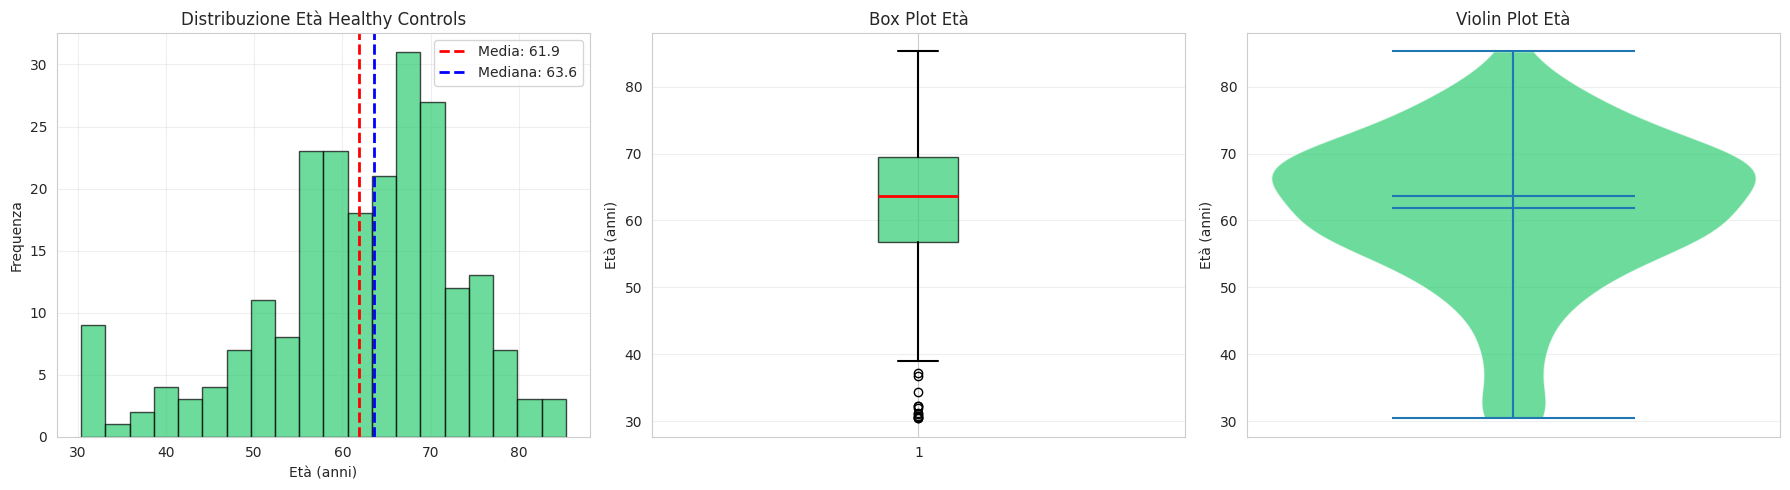


Range età: 30.4 - 85.3 anni
Span: 54.9 anni


In [47]:
# Analisi età enrollment per Healthy Controls
age_data = healthy_with_demo['ENROLL_AGE'].dropna()

print("="*80)
print("DISTRIBUZIONE ETÀ - HEALTHY CONTROLS")
print("="*80)
print(f"Numero soggetti con età: {len(age_data)}")
print(f"\nStatistiche descrittive:")
print(age_data.describe())

# Visualizza distribuzione età
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(age_data, bins=20, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[0].axvline(age_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {age_data.mean():.1f}')
axes[0].axvline(age_data.median(), color='blue', linestyle='--', linewidth=2, label=f'Mediana: {age_data.median():.1f}')
axes[0].set_xlabel('Età (anni)')
axes[0].set_ylabel('Frequenza')
axes[0].set_title('Distribuzione Età Healthy Controls')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(age_data, vert=True, patch_artist=True,
                boxprops=dict(facecolor='#2ecc71', alpha=0.7),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Età (anni)')
axes[1].set_title('Box Plot Età')
axes[1].grid(axis='y', alpha=0.3)

# Violin plot
parts = axes[2].violinplot([age_data], positions=[0], showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_facecolor('#2ecc71')
    pc.set_alpha(0.7)
axes[2].set_ylabel('Età (anni)')
axes[2].set_title('Violin Plot Età')
axes[2].set_xticks([])
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Range età
print(f"\nRange età: {age_data.min():.1f} - {age_data.max():.1f} anni")
print(f"Span: {age_data.max() - age_data.min():.1f} anni")

CONFRONTO ETÀ: HEALTHY CONTROLS vs PARKINSON'S DISEASE

Healthy Controls:
  N = 230
  Età media: 61.9 ± 11.5 anni
  Mediana: 63.6 anni
  Range: 30.4 - 85.3 anni

Parkinson's Disease:
  N = 1096
  Età media: 62.5 ± 9.7 anni
  Mediana: 63.4 anni
  Range: 28.3 - 84.7 anni

T-test indipendente:
  t-statistic = -0.955
  p-value = 0.3396


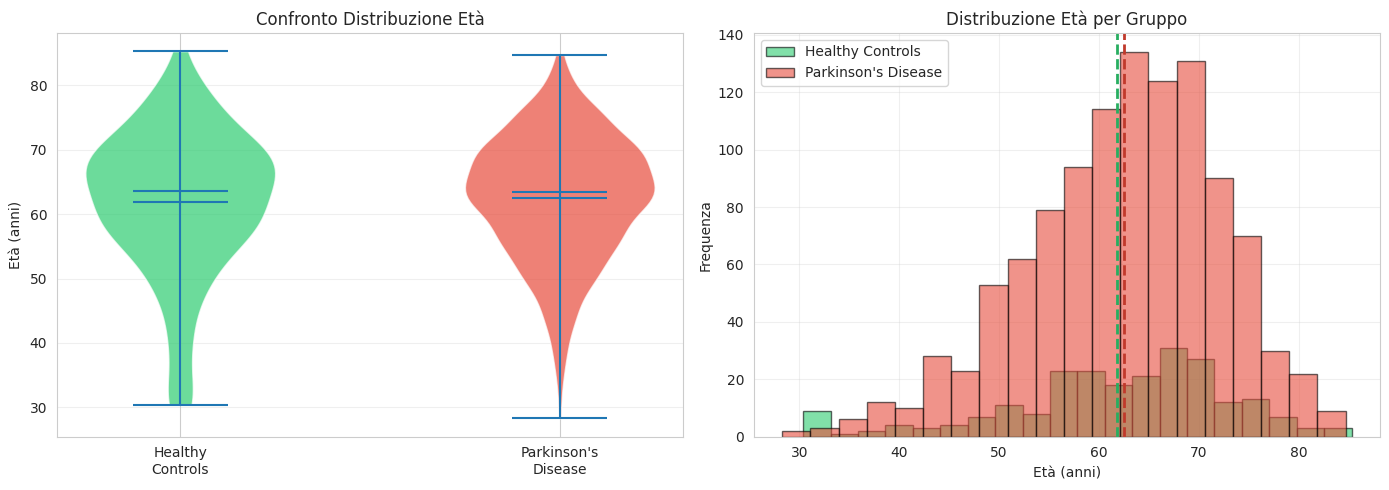

In [48]:
# Confronto età: Healthy Controls vs Parkinson's Disease
pd_subjects = participant_status[
    (participant_status['COHORT'] == 1) & 
    (participant_status['ENROLL_STATUS'] == 'Enrolled')
].merge(demographics, on='PATNO', how='left')

hc_ages = healthy_with_demo['ENROLL_AGE'].dropna()
pd_ages = pd_subjects['ENROLL_AGE'].dropna()

print("="*80)
print("CONFRONTO ETÀ: HEALTHY CONTROLS vs PARKINSON'S DISEASE")
print("="*80)
print(f"\nHealthy Controls:")
print(f"  N = {len(hc_ages)}")
print(f"  Età media: {hc_ages.mean():.1f} ± {hc_ages.std():.1f} anni")
print(f"  Mediana: {hc_ages.median():.1f} anni")
print(f"  Range: {hc_ages.min():.1f} - {hc_ages.max():.1f} anni")

print(f"\nParkinson's Disease:")
print(f"  N = {len(pd_ages)}")
print(f"  Età media: {pd_ages.mean():.1f} ± {pd_ages.std():.1f} anni")
print(f"  Mediana: {pd_ages.median():.1f} anni")
print(f"  Range: {pd_ages.min():.1f} - {pd_ages.max():.1f} anni")

# Test statistico
from scipy import stats
t_stat, p_value = stats.ttest_ind(hc_ages, pd_ages)
print(f"\nT-test indipendente:")
print(f"  t-statistic = {t_stat:.3f}")
print(f"  p-value = {p_value:.4f}")

# Visualizza confronto
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Violin plot comparison
data_to_plot = [hc_ages, pd_ages]
positions = [1, 2]
parts = axes[0].violinplot(data_to_plot, positions=positions, showmeans=True, showmedians=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(['#2ecc71', '#e74c3c'][i])
    pc.set_alpha(0.7)

axes[0].set_xticks(positions)
axes[0].set_xticklabels(['Healthy\nControls', "Parkinson's\nDisease"])
axes[0].set_ylabel('Età (anni)')
axes[0].set_title('Confronto Distribuzione Età')
axes[0].grid(axis='y', alpha=0.3)

# Histogram overlay
axes[1].hist(hc_ages, bins=20, alpha=0.6, color='#2ecc71', label='Healthy Controls', edgecolor='black')
axes[1].hist(pd_ages, bins=20, alpha=0.6, color='#e74c3c', label="Parkinson's Disease", edgecolor='black')
axes[1].axvline(hc_ages.mean(), color='#27ae60', linestyle='--', linewidth=2)
axes[1].axvline(pd_ages.mean(), color='#c0392b', linestyle='--', linewidth=2)
axes[1].set_xlabel('Età (anni)')
axes[1].set_ylabel('Frequenza')
axes[1].set_title('Distribuzione Età per Gruppo')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Distribuzione per Sesso

DISTRIBUZIONE PER SESSO - HEALTHY CONTROLS
Male      : 130 ( 56.5%)
Female    : 100 ( 43.5%)


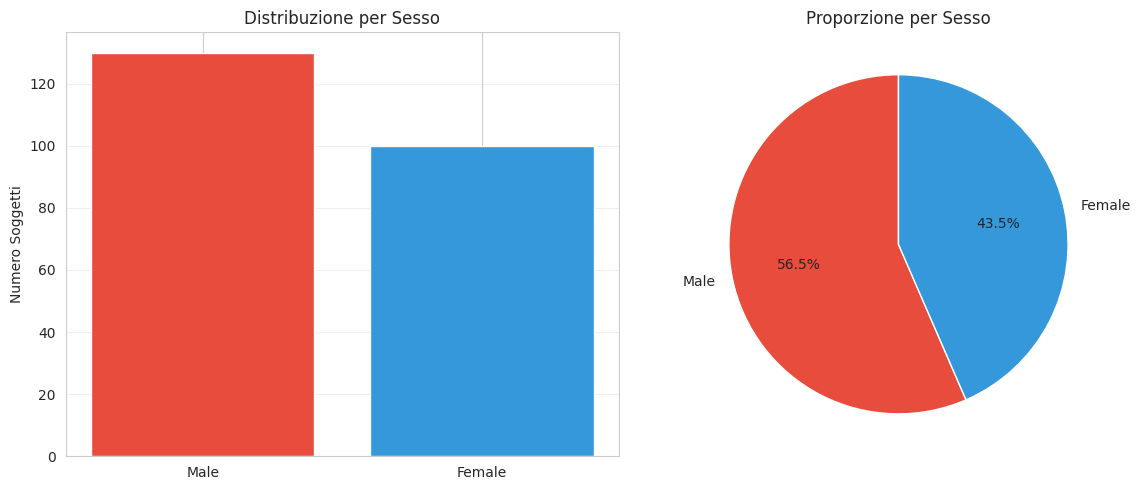


Distribuzione età per sesso:

Male:
  N = 130
  Età media: 62.5 ± 11.0 anni
  Range: 30.4 - 80.0 anni

Female:
  N = 100
  Età media: 61.0 ± 12.1 anni
  Range: 30.4 - 85.3 anni


In [49]:
# Analisi distribuzione sesso
sex_mapping = {0: 'Female', 1: 'Male'}
healthy_with_demo['SEX_LABEL'] = healthy_with_demo['SEX'].map(sex_mapping)

sex_counts = healthy_with_demo['SEX_LABEL'].value_counts()

print("="*80)
print("DISTRIBUZIONE PER SESSO - HEALTHY CONTROLS")
print("="*80)
for sex, count in sex_counts.items():
    percentage = (count / len(healthy_with_demo)) * 100
    print(f"{sex:10s}: {count:3d} ({percentage:5.1f}%)")

# Visualizza
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
axes[0].bar(range(len(sex_counts)), sex_counts.values, color=['#e74c3c', '#3498db'])
axes[0].set_xticks(range(len(sex_counts)))
axes[0].set_xticklabels(sex_counts.index)
axes[0].set_ylabel('Numero Soggetti')
axes[0].set_title('Distribuzione per Sesso')
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
colors = ['#e74c3c', '#3498db']
axes[1].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
axes[1].set_title('Proporzione per Sesso')

plt.tight_layout()
plt.show()

# Età per sesso
print("\nDistribuzione età per sesso:")
for sex in sex_counts.index:
    sex_ages = healthy_with_demo[healthy_with_demo['SEX_LABEL'] == sex]['ENROLL_AGE'].dropna()
    print(f"\n{sex}:")
    print(f"  N = {len(sex_ages)}")
    print(f"  Età media: {sex_ages.mean():.1f} ± {sex_ages.std():.1f} anni")
    print(f"  Range: {sex_ages.min():.1f} - {sex_ages.max():.1f} anni")

## 6. Analisi Dati Imaging Convertiti

In [50]:
# Analizza dati imaging convertiti
from pathlib import Path
from collections import Counter

# Load conversion statistics
import json
with open('/mnt/db_ext/RAW/PPMI/nifti/conversion_statistics.json', 'r') as f:
    stats = json.load(f)

print("="*80)
print("STATISTICHE CONVERSIONE DICOM → NIfTI")
print("="*80)
for key, value in stats.items():
    print(f"{key.replace('_', ' ').title():30s}: {value}")

# Analizza soggetti con imaging
nifti_root = Path(nifti_full_path)
subjects_with_imaging = []
subject_sessions = {}

for subj_dir in sorted(nifti_root.glob("sub-*")):
    subj_id = int(subj_dir.name.replace('sub-', ''))
    sessions = sorted([s.name for s in subj_dir.glob("ses-*")])
    
    subjects_with_imaging.append(subj_id)
    subject_sessions[subj_id] = sessions

print(f"\n{'='*80}")
print("SOGGETTI CON DATI IMAGING")
print("="*80)
print(f"Totale soggetti con imaging: {len(subjects_with_imaging)}")

# Conta timepoint
timepoint_counts = Counter([len(sessions) for sessions in subject_sessions.values()])
print(f"\nDistribuzione timepoint:")
for n_tp, count in sorted(timepoint_counts.items()):
    percentage = (count / len(subjects_with_imaging)) * 100
    print(f"  {n_tp} timepoint(s): {count:3d} soggetti ({percentage:5.1f}%)")

# Match con metadata
hc_with_imaging = healthy_controls[healthy_controls['PATNO'].isin(subjects_with_imaging)]
hc_without_imaging = healthy_controls[~healthy_controls['PATNO'].isin(subjects_with_imaging)]

print(f"\n{'='*80}")
print("HEALTHY CONTROLS CON/SENZA IMAGING")
print("="*80)
print(f"HC con imaging:    {len(hc_with_imaging):3d} / {len(healthy_controls)} ({len(hc_with_imaging)/len(healthy_controls)*100:.1f}%)")
print(f"HC senza imaging:  {len(hc_without_imaging):3d} / {len(healthy_controls)} ({len(hc_without_imaging)/len(healthy_controls)*100:.1f}%)")

STATISTICHE CONVERSIONE DICOM → NIfTI
Total Subjects                : 230
Subjects With Dicom           : 187
Subjects Without Dicom        : 43
Total Sequences               : 241
Successful Conversions        : 241
Failed Conversions            : 0
Total Sessions                : 231

SOGGETTI CON DATI IMAGING
Totale soggetti con imaging: 187

Distribuzione timepoint:
  1 timepoint(s): 154 soggetti ( 82.4%)
  2 timepoint(s):  23 soggetti ( 12.3%)
  3 timepoint(s):   9 soggetti (  4.8%)
  4 timepoint(s):   1 soggetti (  0.5%)

HEALTHY CONTROLS CON/SENZA IMAGING
HC con imaging:    187 / 230 (81.3%)
HC senza imaging:   43 / 230 (18.7%)


## 7. Dataset Baseline per Modello Normativo

DATASET BASELINE PER MODELLO NORMATIVO

Path: /mnt/db_ext/RAW/PPMI/nifti_baseline

Caratteristiche:
  Total Subjects                          : 187
  Subjects With Multiple Timepoints       : 33
  Subjects With Single Timepoint          : 154
  Selection Strategy                      : baseline_only
  Description                             : Baseline (first timepoint) scans only for normative modeling

STATISTICHE DATASET BASELINE
Totale soggetti: 187
Con età disponibile: 187
Con sesso disponibile: 187

Range temporale scan:
  Anno più vecchio: 2010
  Anno più recente: 2024
  Span: 14 anni


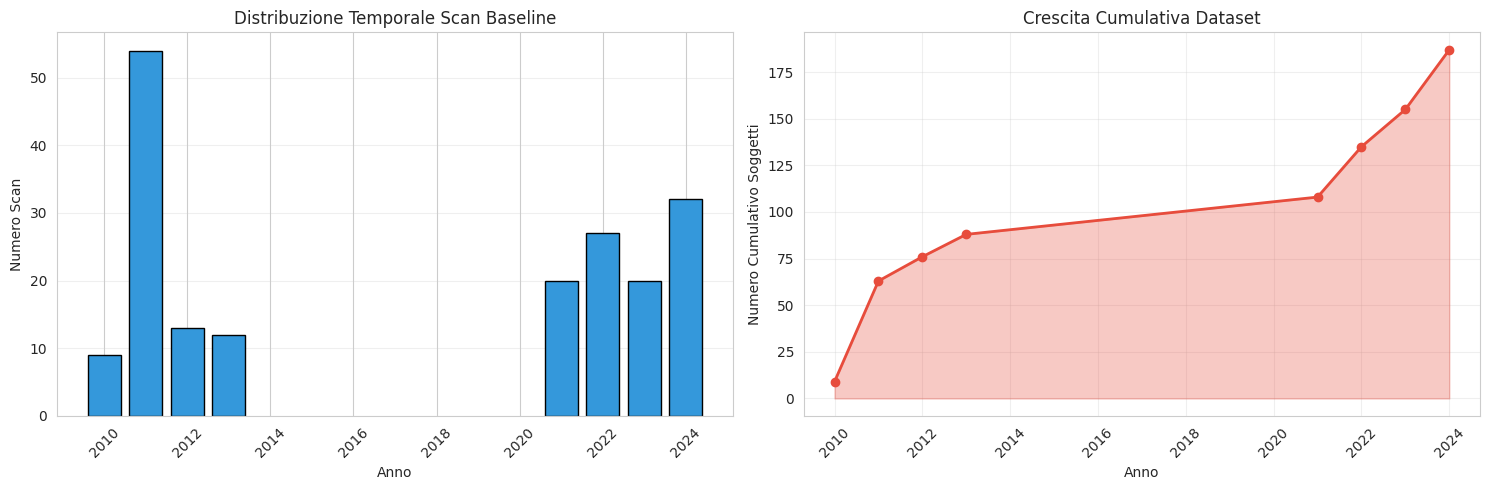

,participant_id,baseline_session,scan_date,PATNO,ENROLL_AGE,SEX,SEX_LABEL,scan_year
0,sub-100956,ses-20210614,20210614,100956,75.2,0.0,Female,2021
1,sub-101039,ses-20210427,20210427,101039,63.2,0.0,Female,2021
2,sub-101195,ses-20210517,20210517,101195,73.8,1.0,Male,2021
3,sub-101480,ses-20210728,20210728,101480,70.8,0.0,Female,2021
4,sub-101556,ses-20210611,20210611,101556,66.5,0.0,Female,2021
5,sub-101747,ses-20210707,20210707,101747,61.9,1.0,Male,2021
6,sub-102366,ses-20210816,20210816,102366,65.3,0.0,Female,2021
7,sub-102447,ses-20210901,20210901,102447,60.8,1.0,Male,2021
8,sub-103161,ses-20210903,20210903,103161,58.9,1.0,Male,2021
9,sub-103183,ses-20210908,20210908,103183,57.7,1.0,Male,2021


In [51]:
# Analizza dataset baseline (solo primo timepoint)
baseline_root = Path(nifti_baseline_path)

# Load baseline info
baseline_df = pd.read_csv(baseline_root / "baseline_sessions.tsv", sep='\t')
with open(baseline_root / "baseline_selection_info.json", 'r') as f:
    baseline_info = json.load(f)

print("="*80)
print("DATASET BASELINE PER MODELLO NORMATIVO")
print("="*80)
print(f"\nPath: {nifti_baseline_path}")
print(f"\nCaratteristiche:")
for key, value in baseline_info.items():
    if key not in ['source_dataset', 'creation_date']:
        print(f"  {key.replace('_', ' ').title():40s}: {value}")

# CORREZIONE: Estrai PATNO da participant_id (rimuovi prefisso 'sub-')
baseline_df['PATNO'] = baseline_df['participant_id'].str.replace('sub-', '').astype(int)

# Merge baseline con demographics
baseline_with_demo = baseline_df.merge(
    healthy_with_demo[['PATNO', 'ENROLL_AGE', 'SEX', 'SEX_LABEL']], 
    on='PATNO',  # Usa direttamente PATNO su entrambi i lati
    how='left'
)

# Extract year from scan_date
baseline_with_demo['scan_year'] = baseline_with_demo['scan_date'].astype(str).str[:4].astype(int)

print(f"\n{'='*80}")
print("STATISTICHE DATASET BASELINE")
print("="*80)
print(f"Totale soggetti: {len(baseline_with_demo)}")
print(f"Con età disponibile: {baseline_with_demo['ENROLL_AGE'].notna().sum()}")
print(f"Con sesso disponibile: {baseline_with_demo['SEX'].notna().sum()}")
print(f"\nRange temporale scan:")
print(f"  Anno più vecchio: {baseline_with_demo['scan_year'].min()}")
print(f"  Anno più recente: {baseline_with_demo['scan_year'].max()}")
print(f"  Span: {baseline_with_demo['scan_year'].max() - baseline_with_demo['scan_year'].min()} anni")

# Visualizza distribuzione temporale
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram per anno
year_counts = baseline_with_demo['scan_year'].value_counts().sort_index()
axes[0].bar(year_counts.index, year_counts.values, color='#3498db', edgecolor='black')
axes[0].set_xlabel('Anno')
axes[0].set_ylabel('Numero Scan')
axes[0].set_title('Distribuzione Temporale Scan Baseline')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Cumulative
cumulative = year_counts.sort_index().cumsum()
axes[1].plot(cumulative.index, cumulative.values, marker='o', linewidth=2, markersize=6, color='#e74c3c')
axes[1].fill_between(cumulative.index, cumulative.values, alpha=0.3, color='#e74c3c')
axes[1].set_xlabel('Anno')
axes[1].set_ylabel('Numero Cumulativo Soggetti')
axes[1].set_title('Crescita Cumulativa Dataset')
axes[1].grid(alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

baseline_with_demo.head(10)

## 8. Decisione Finale: Quale Dataset Usare?

In [55]:
# Confronto dataset completo vs baseline
print("="*80)
print("CONFRONTO: DATASET COMPLETO vs BASELINE")
print("="*80)

comparison = pd.DataFrame({
    'Metrica': [
        'Totale soggetti',
        'Totale scan',
        'Soggetti con 1 timepoint',
        'Soggetti con >1 timepoint',
        'Indipendenza statistica',
        'Dimensione (GB)',
        'Uso raccomandato'
    ],
    'Dataset Completo': [
        '187',
        '244',
        '154 (82.4%)',
        '33 (17.6%)',
        '❌ Violata',
        '3.2',
        'Analisi longitudinali'
    ],
    'Dataset Baseline': [
        '187',
        '187',
        '187 (100%)',
        '0 (0%)',
        '✅ Rispettata',
        '2.7',
        'Modello Normativo'
    ]
})

print(comparison.to_string(index=False))

print(f"\n{'='*80}")
print("RACCOMANDAZIONE PER MODELLO NORMATIVO")
print("="*80)
print(f"\n📊 Caratteristiche:")
print(f"   • 187 soggetti sani indipendenti")
print(f"   • Solo baseline (primo timepoint)")
print(f"   • Indipendenza statistica garantita")
print(f"   • Nessun bias da follow-up selettivo")

print(f"\n{'='*80}")

CONFRONTO: DATASET COMPLETO vs BASELINE
                  Metrica      Dataset Completo  Dataset Baseline
          Totale soggetti                   187               187
              Totale scan                   244               187
 Soggetti con 1 timepoint           154 (82.4%)        187 (100%)
Soggetti con >1 timepoint            33 (17.6%)            0 (0%)
  Indipendenza statistica             ❌ Violata      ✅ Rispettata
          Dimensione (GB)                   3.2               2.7
         Uso raccomandato Analisi longitudinali Modello Normativo

RACCOMANDAZIONE PER MODELLO NORMATIVO

📊 Caratteristiche:
   • 187 soggetti sani indipendenti
   • Solo baseline (primo timepoint)
   • Indipendenza statistica garantita
   • Nessun bias da follow-up selettivo



## 9. Export Dataset Finale per Analisi

In [56]:
# Crea file CSV con informazioni complete per dataset baseline
output_file = "data/PPMI/PPMI_baseline_healthy_controls.csv"

# Prepara dataframe finale
final_df = baseline_with_demo.copy()

# Aggiungi path alle immagini NIfTI
final_df['nifti_path'] = final_df.apply(
    lambda row: f"{nifti_baseline_path}/{row['participant_id']}/{row['baseline_session']}/anat/{row['participant_id']}_{row['baseline_session']}_T1w.nii.gz",
    axis=1
)

# Seleziona colonne rilevanti
columns_to_keep = [
    'participant_id',
    'PATNO', 
    'baseline_session',
    'scan_date',
    'scan_year',
    'ENROLL_AGE',
    'SEX',
    'SEX_LABEL',
    'nifti_path'
]

final_export = final_df[columns_to_keep].copy()

# Rinomina colonne per chiarezza
final_export.columns = [
    'subject_id',
    'patno',
    'session_id',
    'scan_date',
    'scan_year',
    'age',
    'sex_numeric',
    'sex',
    'nifti_file'
]

# Salva
final_export.to_csv(output_file, index=False)

print("="*80)
print("EXPORT DATASET FINALE")
print("="*80)
print(f"\nFile salvato: {output_file}")
print(f"Numero record: {len(final_export)}")
print(f"\nColonne esportate:")
for col in final_export.columns:
    print(f"  • {col}")

print(f"\nDataset pronto per:")
print(f"  ✓ Preprocessing imaging")
print(f"  ✓ Feature extraction")
print(f"  ✓ Costruzione modello normativo")

print(f"\n{'='*80}")
print("RIEPILOGO FINALE")
print("="*80)
print(f"\n📁 Dataset selezionato: Baseline-only")
print(f"👥 Soggetti: {len(final_export)} Healthy Controls")
print(f"🧠 Tipo imaging: T1-weighted MRI")
print(f"📊 Formato: NIfTI (.nii.gz) + BIDS")
print(f"🎯 Obiettivo: Modello Normativo")
print(f"\n{'='*80}")

# Preview
final_export.head(10)

EXPORT DATASET FINALE

File salvato: data/PPMI/PPMI_baseline_healthy_controls.csv
Numero record: 187

Colonne esportate:
  • subject_id
  • patno
  • session_id
  • scan_date
  • scan_year
  • age
  • sex_numeric
  • sex
  • nifti_file

Dataset pronto per:
  ✓ Preprocessing imaging
  ✓ Feature extraction
  ✓ Costruzione modello normativo

RIEPILOGO FINALE

📁 Dataset selezionato: Baseline-only
👥 Soggetti: 187 Healthy Controls
🧠 Tipo imaging: T1-weighted MRI
📊 Formato: NIfTI (.nii.gz) + BIDS
🎯 Obiettivo: Modello Normativo



,subject_id,patno,session_id,scan_date,scan_year,age,sex_numeric,sex,nifti_file
0,sub-100956,100956,ses-20210614,20210614,2021,75.2,0.0,Female,/mnt/db_ext/RAW/PPMI/nifti_baseline/sub-100956...
1,sub-101039,101039,ses-20210427,20210427,2021,63.2,0.0,Female,/mnt/db_ext/RAW/PPMI/nifti_baseline/sub-101039...
2,sub-101195,101195,ses-20210517,20210517,2021,73.8,1.0,Male,/mnt/db_ext/RAW/PPMI/nifti_baseline/sub-101195...
3,sub-101480,101480,ses-20210728,20210728,2021,70.8,0.0,Female,/mnt/db_ext/RAW/PPMI/nifti_baseline/sub-101480...
4,sub-101556,101556,ses-20210611,20210611,2021,66.5,0.0,Female,/mnt/db_ext/RAW/PPMI/nifti_baseline/sub-101556...
5,sub-101747,101747,ses-20210707,20210707,2021,61.9,1.0,Male,/mnt/db_ext/RAW/PPMI/nifti_baseline/sub-101747...
6,sub-102366,102366,ses-20210816,20210816,2021,65.3,0.0,Female,/mnt/db_ext/RAW/PPMI/nifti_baseline/sub-102366...
7,sub-102447,102447,ses-20210901,20210901,2021,60.8,1.0,Male,/mnt/db_ext/RAW/PPMI/nifti_baseline/sub-102447...
8,sub-103161,103161,ses-20210903,20210903,2021,58.9,1.0,Male,/mnt/db_ext/RAW/PPMI/nifti_baseline/sub-103161...
9,sub-103183,103183,ses-20210908,20210908,2021,57.7,1.0,Male,/mnt/db_ext/RAW/PPMI/nifti_baseline/sub-103183...
